In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

2022-09-16 13:03:21.129816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 13:03:21.532383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 13:03:21.532414: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-16 13:03:21.592803: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 13:03:22.673544: W tensorflow/stream_executor/platform/de

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
print(f"training data: {X_train.shape}")
print(f"training label: {y_train.shape}")
print()
print(f"test data: {X_test.shape}")
print(f"test label: {y_test.shape}")

training data: (60000, 28, 28)
training label: (60000,)

test data: (10000, 28, 28)
test label: (10000,)


In [5]:
labels = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

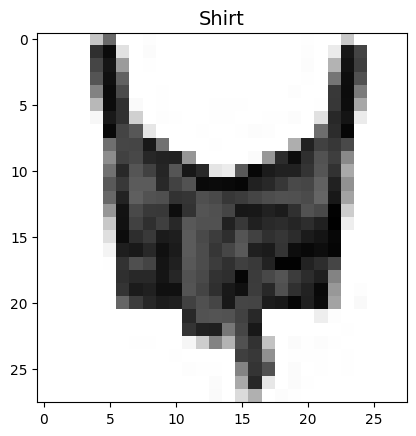

In [6]:
idx = np.random.randint(0, len(y_test))

plt.imshow(X_test[idx], cmap=plt.cm.binary)
plt.title(labels[y_test[idx]], fontsize=14)
plt.show()

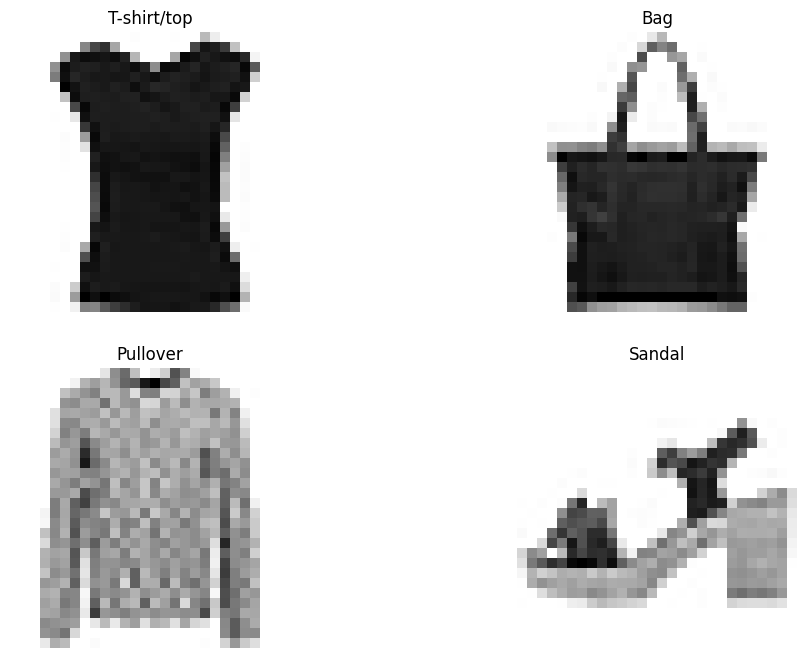

In [7]:
plt.figure(figsize=(12, 8))
for i in range(4):
    idx = np.random.randint(0, len(y_test))
    ax = plt.subplot(2, 2, i+1)
    plt.imshow(X_test[idx], cmap=plt.cm.binary)
    plt.title(labels[y_test[idx]])
    plt.axis(False)

## Membangun multi kelas klasifikasi

* Input-shape = 28 $\times$ 28 (dimensi input)
* Output-shape = 10 $\times$ 28 (dimensi input)
* Loss function = tf.keras.losses.CategoricalCrossenentropy()
* Output layer activation = Softmax (bukan sigmoid)

In [8]:
tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='softmax'),
])

model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10


2022-09-16 13:03:26.583820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-16 13:03:26.583853: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-16 13:03:26.583878: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anggads01): /proc/driver/nvidia/version does not exist
2022-09-16 13:03:26.584543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 

In [9]:
(X_train.max(), X_train.min())

(255, 0)

NN lebih memilih data yang sudah di scale karna ini artinya mereka suka untuk memiliki jumlah pada tensors, mereka mencoba menemukan pola antara 0 dan 1

In [10]:
X_train_scaled=tf.keras.utils.normalize(X_train,axis=1)
X_test_scaled=tf.keras.utils.normalize(X_test,axis=1)

X_train_scaled.min(), X_test_scaled.max()

(0.0, 1.0)

In [11]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

X_train_scaled.min(), X_test_scaled.max()

(0.0, 1.0)

In [12]:
tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_rate_schedular = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=25,
    validation_data=(X_test_scaled, y_test),
    callbacks=[lr_rate_schedular],
)

Epoch 1/25


2022-09-16 13:04:04.501361: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1861/1875 [============================>.] - ETA: 0s - loss: 0.7029 - accuracy: 0.7573

2022-09-16 13:04:08.131487: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7018 - accuracy: 0.7576 - val_loss: 0.5502 - val_accuracy: 0.8114 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4884 - accuracy: 0.8317 - val_loss: 0.5606 - val_accuracy: 0.8067 - lr: 0.0011
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4495 - accuracy: 0.8431 - val_loss: 0.4993 - val_accuracy: 0.8170 - lr: 0.0013
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4246 - accuracy: 0.8514 - val_loss: 0.4454 - val_accuracy: 0.8405 - lr: 0.0014
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4102 - accuracy: 0.8555 - val_loss: 0.4575 - val_accuracy: 0.8390 - lr: 0.0016
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3956 - accuracy: 0.8598 - val_loss: 0.4581 - val_accuracy: 0.8316 - lr: 0.0018
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step -

<AxesSubplot:>

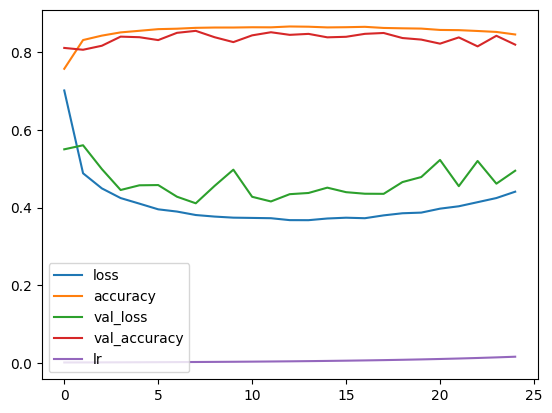

In [13]:
pd.DataFrame(history.history).plot()

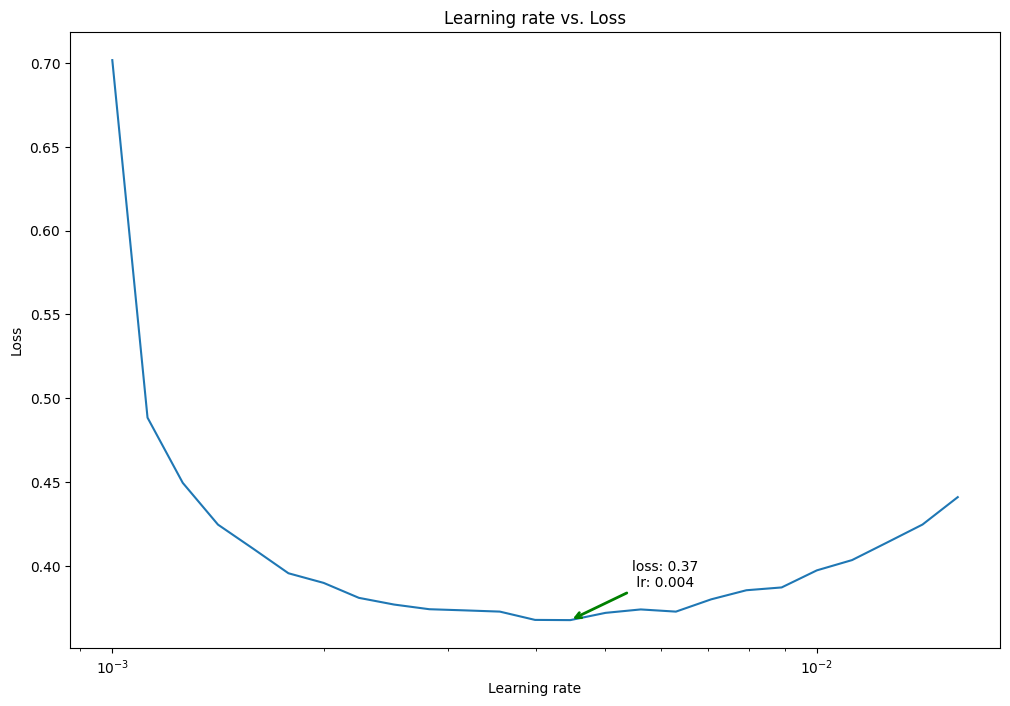

In [14]:
# Tuning lr ideally

lrs =  1e-3 * (10**(tf.range(25) / 20))
loss = np.array(history.history['loss'])

history_lr = pd.DataFrame(np.c_[lrs, np.array(history.history['loss'])])
x_lr, y_loss = history_lr.iloc[np.argmin(loss), :] 

plt.figure(figsize=(12, 8))
plt.semilogx(lrs, loss)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

plt.annotate(
    f"loss: {round(y_loss, 2)}\n lr: {round(x_lr, 3)}", 
    xy=(x_lr, y_loss), 
    xytext=(x_lr+0.001, y_loss+0.02), 
    arrowprops=dict(arrowstyle="->", 
    color="green", 
    lw=2,
   )
)

plt.show()


In [15]:
tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.00112),
    metrics=['accuracy']
)

history_true = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=20,
    validation_data=(X_test_scaled, y_test),
)

Epoch 1/20


2022-09-16 13:05:35.327910: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6706 - accuracy: 0.7688 - val_loss: 0.5015 - val_accuracy: 0.8200
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4500 - accuracy: 0.8414 - val_loss: 0.5148 - val_accuracy: 0.8211
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4200 - accuracy: 0.8510 - val_loss: 0.4597 - val_accuracy: 0.8325
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4012 - accuracy: 0.8581 - val_loss: 0.4499 - val_accuracy: 0.8382
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8615 - val_loss: 0.4562 - val_accuracy: 0.8372
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8653 - val_loss: 0.4408 - val_accuracy: 0.8444
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8669 - val_loss: 0.4210 - val_accuracy: 0.8529
Epo

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 146.1283 - accuracy: 0.7467


[146.1283416748047, 0.7466999888420105]

In [17]:
def plot_confusion_matrix(
    matrix,
    class_labels=False,
    figsize=(16, 8), 
    y_ticks_rot=0, 
    x_ticks_rot=0, 
    fs_title=20, 
    fs_label=14, 
    pallete=plt.cm.magma
):
    norm = matrix.sum(axis=1, keepdims=True).ravel()
    cm = np.array(
        [
            f"{val}\n({val / (norm[idx if idx < len(norm) else len(norm) - 1])*100:.2f}%)"
            for idx, val 
            in enumerate(matrix.ravel())
        ]
        ).reshape(matrix.shape)

    plt.figure(figsize=figsize)

    if class_labels:
        values_labels = [val for val in class_labels.values()]
    else:
        values_labels = "auto"

    sns.heatmap(
        matrix, 
        annot=cm, 
        cmap=pallete, 
        fmt='s', 
        xticklabels=values_labels, 
        yticklabels=values_labels
    )
    plt.xticks(rotation=x_ticks_rot)
    plt.yticks(rotation=y_ticks_rot)
    plt.ylabel('True Label', fontsize=fs_label)
    plt.xlabel('Predicted Label', fontsize=fs_label)
    plt.title('confusion matrix', fontsize=fs_title)
    plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

313/313 [==============================] - 0s 1ms/step


array([[813,   7,  16,  31,   5,   1, 119,   0,   8,   0],
       [  2, 966,   2,  19,   7,   0,   4,   0,   0,   0],
       [ 11,   2, 745,   9, 168,   1,  63,   0,   1,   0],
       [ 24,  21,  13, 826,  68,   0,  43,   0,   5,   0],
       [  0,   1,  77,  16, 861,   0,  45,   0,   0,   0],
       [  1,   0,   0,   0,   0, 919,   0,  42,   5,  33],
       [125,   2, 116,  26, 150,   0, 571,   0,  10,   0],
       [  0,   0,   0,   0,   0,  20,   0, 952,   0,  28],
       [  7,   0,   5,   3,  10,   5,  14,   6, 949,   1],
       [  0,   0,   0,   0,   0,   5,   2,  44,   2, 947]])

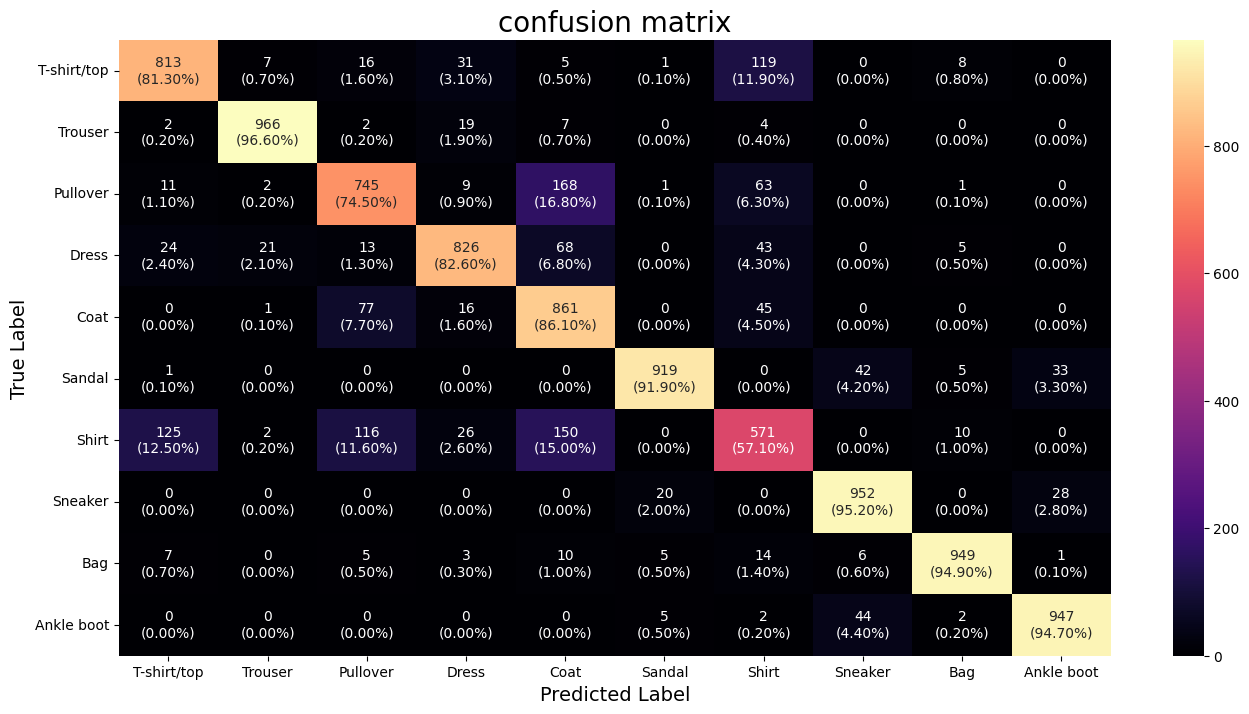

In [19]:
labels = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}
plot_confusion_matrix(cm, class_labels=labels, pallete=plt.cm.magma)

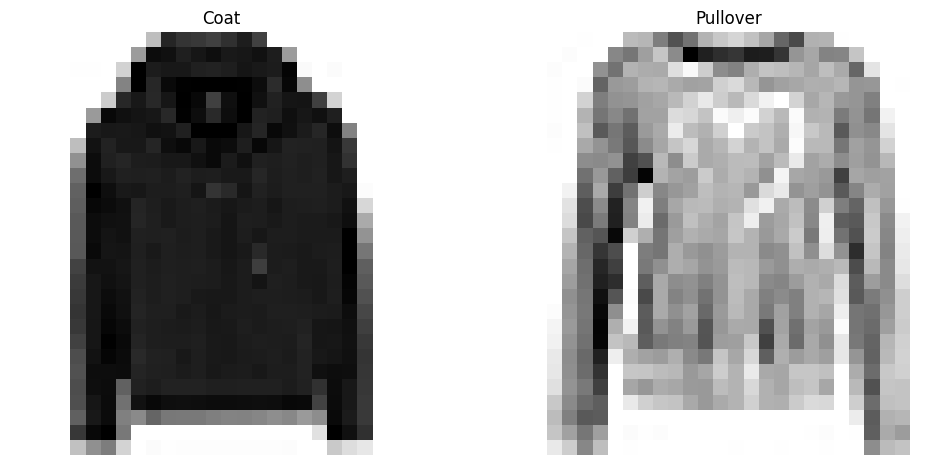

In [20]:
target_1 = 'Coat'
target_2 = 'Pullover'

t_shirt = [idx for idx, val in enumerate(y_test) if labels[val] == target_1]
shirt = [idx for idx, val in enumerate(y_test) if labels[val] == target_2]

idx_tShirt = np.random.randint(0, len(t_shirt))
idx_shirt = np.random.randint(0, len(shirt))

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.imshow(X_test[t_shirt[idx_tShirt]], cmap=plt.cm.binary)
plt.title(target_1)
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(X_test[shirt[idx_shirt]], cmap=plt.cm.binary)
plt.title(target_2)
plt.axis(False)

plt.show()

In [21]:
def plot_predict_img(model, X_test, y_test):
    idx = np.random.randint(0, len(X_test_scaled))
    target_img = X_test_scaled[idx]

    y_pred = model.predict(target_img)

    y_test_label = labels[y_test[idx]]
    y_pred_label = labels[np.argmax(y_pred)]
    y_prob = tf.round(100*tf.reduce_max(y_pred), 3)

    plt.imshow(X_test_scaled[idx], cmap=plt.cm.binary)
    plt.title(
        f'True: {y_test_label}\n Pred {y_prob}%: {y_pred_label}', 
        y=1.2,
        color = 'green' if y_test_label == y_pred_label else 'red',
        fontweight='bold'
    )

    plt.axis(False)
    plt.show()

1/1 [==============================] - 0s 73ms/step


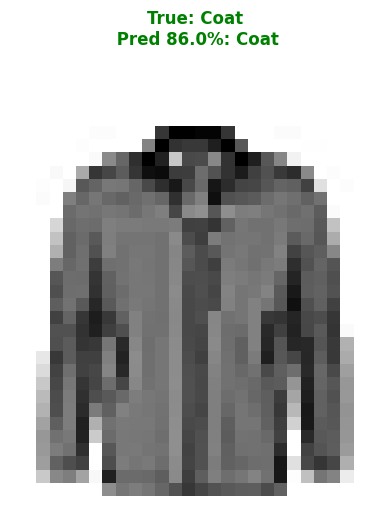

In [22]:
plot_predict_img(model, X_test_scaled, y_test)

### pola apa yang menjadi model learning kita

In [23]:
# mendapatkan pola dari layer pada NN kita
weights, biases = model.layers[1].get_weights()

weights.shape, weights

((784, 16),
 array([[ 0.28548592,  0.20004883, -0.01486026, ...,  0.57105434,
          0.04100744,  0.2173546 ],
        [ 0.15446702, -0.2230412 , -0.3103308 , ...,  0.6501742 ,
          0.02880453,  0.05768733],
        [ 0.5541876 , -0.2407569 , -0.6825319 , ...,  0.8518438 ,
          0.01997916, -0.06834987],
        ...,
        [-0.12153976, -0.14530092, -0.07310738, ...,  0.11386748,
          0.00425962,  0.20958224],
        [ 0.39890316,  0.42262146,  0.44104186, ..., -0.85271615,
          0.03638755,  0.43177977],
        [ 0.66187346, -0.07042431, -0.2573884 , ...,  0.20444825,
         -0.04631746, -0.12583826]], dtype=float32))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________


In [25]:
biases, biases.shape

(array([ 0.8412387 , -0.7395949 ,  1.4969335 ,  0.6847726 ,  0.84842145,
         0.2759927 , -0.09783918, -0.05748085,  0.44459945,  0.21944483,
         0.5130136 , -0.01907208,  0.10557386,  0.628809  , -0.01944451,
         0.43603006], dtype=float32),
 (16,))

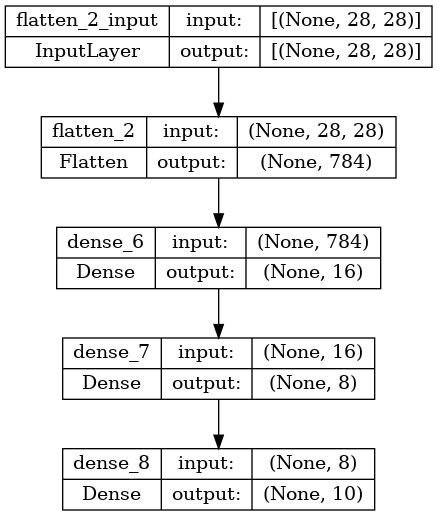

In [26]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes=True) # kalo gak bisa maka install pydot (`pip install pydot`) dan install graphviz (lihat instruksi pada https://graphviz.gitlab.io/download/) untuk plot_model bekerja.